<a href="https://colab.research.google.com/github/khushbu86shah/TASK-1/blob/main/TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Khushbu Shah**
# TASK 5 : @THE SPARKS FOUNDATION
# Perform Exploratory Data Analysis on Sports dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [88]:
data = pd.read_csv(r"/content/matchessports.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [89]:
Data = pd.read_csv(r"/content/deliveriessports.csv")
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [63]:
season_data = data[['id' , 'season' , 'winner']]
complete_data = Data.merge(season_data , how='inner' ,left_on = 'match_id', right_on = 'id')

In [64]:
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [65]:
data = data.drop(columns = ["umpire3"], axis = 1)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [66]:
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

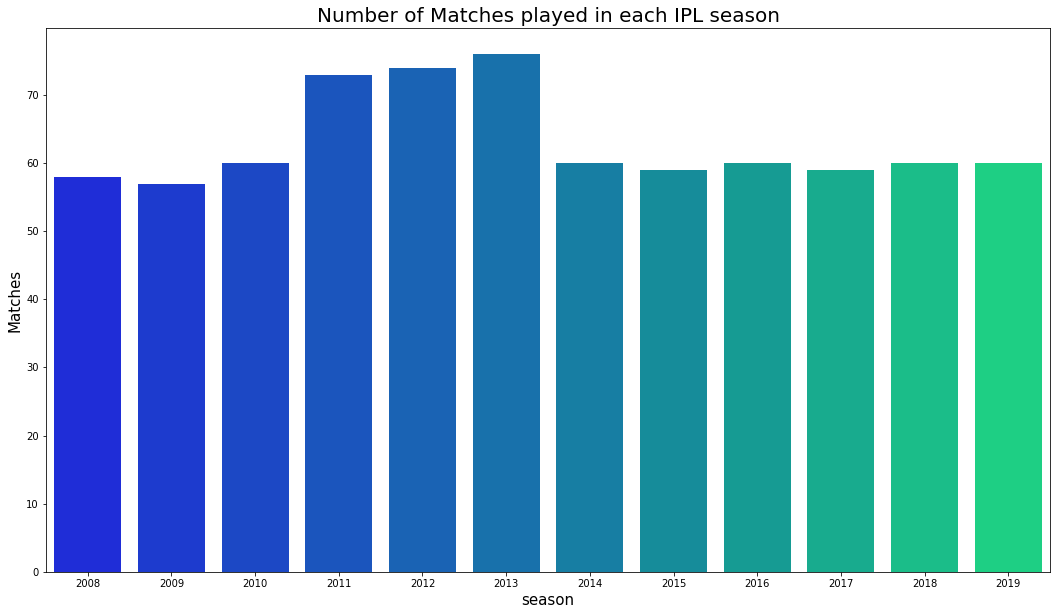

In [67]:
plt.figure(figsize = (18,10))
sns.countplot('season',data = data, palette = "winter")
plt.title("Number of Matches played in each IPL season" ,fontsize = 20)
plt.xlabel("season" , fontsize=15)
plt.ylabel("Matches" , fontsize = 15)
plt.show()

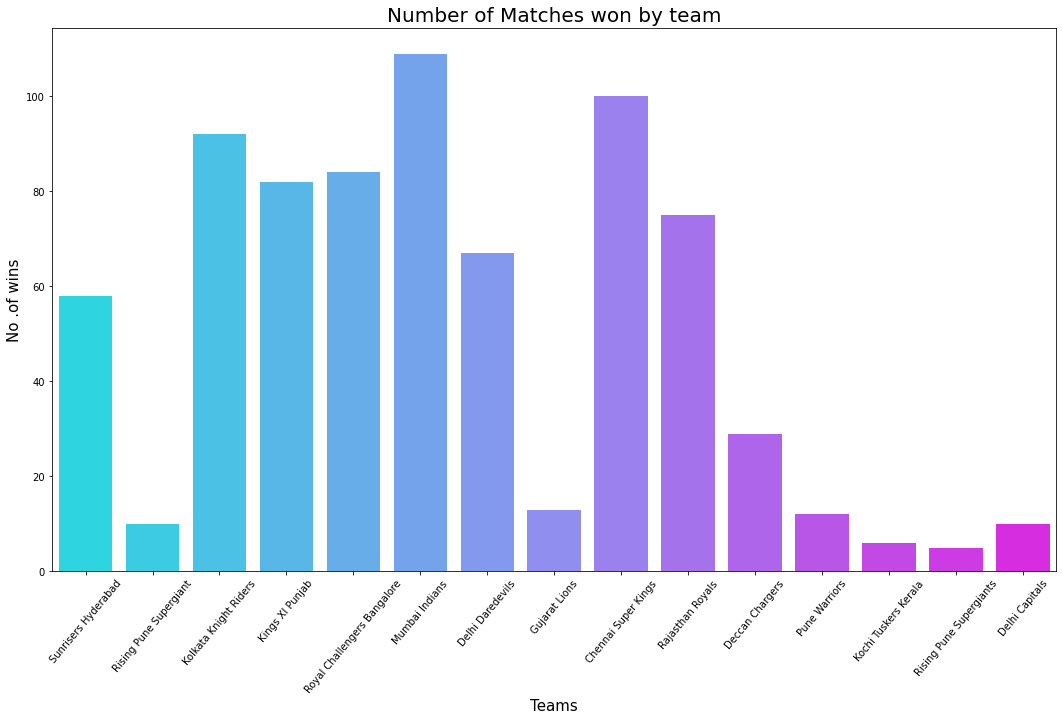

In [68]:
plt.figure(figsize = (18,10))
sns.countplot(x = 'winner',data = data, palette = "cool")
plt.title("Number of Matches won by team" ,fontsize = 20)
plt.xticks(rotation = 50)
plt.xlabel("Teams" , fontsize =15)
plt.ylabel("No .of wins" , fontsize = 15)
plt.show()

In [69]:
data['win_by'] = np.where(data["win_by_runs"]>0 , 'Bat first' , 'Bowl first')

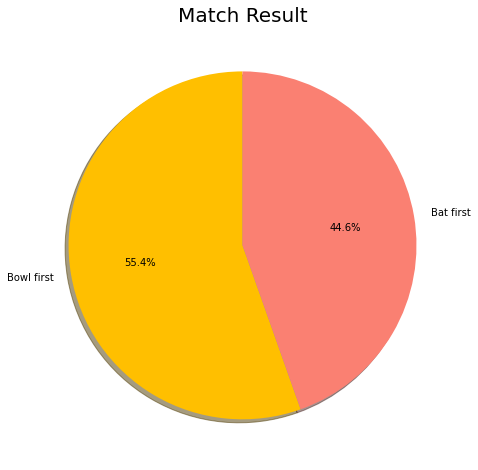

In [70]:
Win  = data.win_by.value_counts()
labels = np.array(Win.index)
sizes = Win.values
colors = ['#FFBF00' , '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes , labels = labels , colors = colors,
        autopct = '%1.1f%%' , shadow = True , startangle = 90)
plt.title('Match Result' ,fontsize = 20)
plt.show()

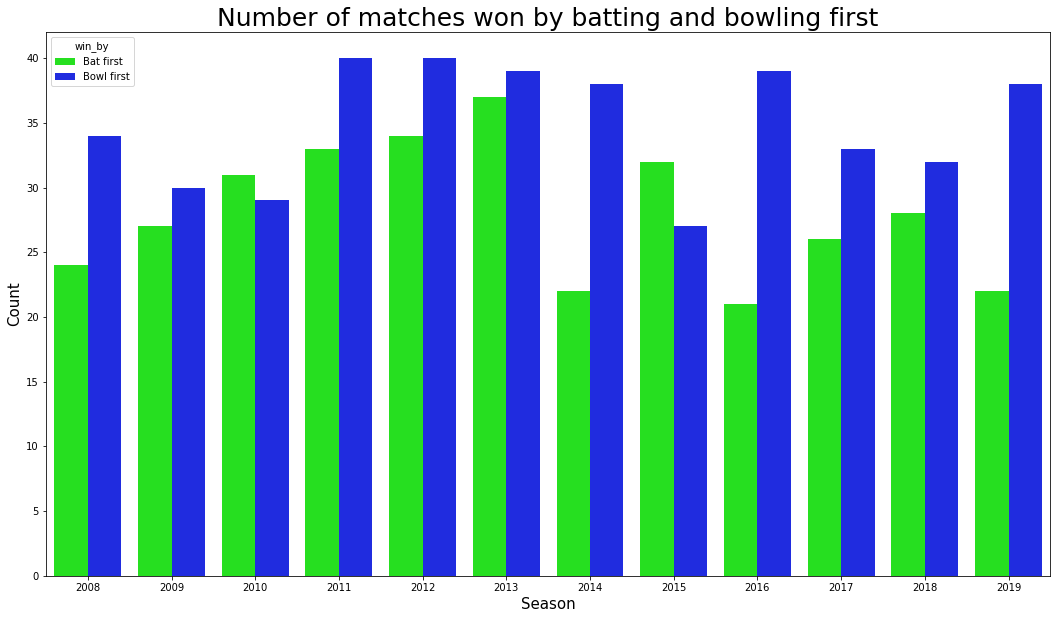

In [71]:
plt.figure(figsize = (18,10))
sns.countplot('season', hue = 'win_by' ,data =data , palette = 'hsv')
plt.title("Number of matches won by batting and bowling first" ,fontsize = 25)
plt.xlabel("Season",fontsize =15)
plt.ylabel("Count",fontsize =15)
plt.show()

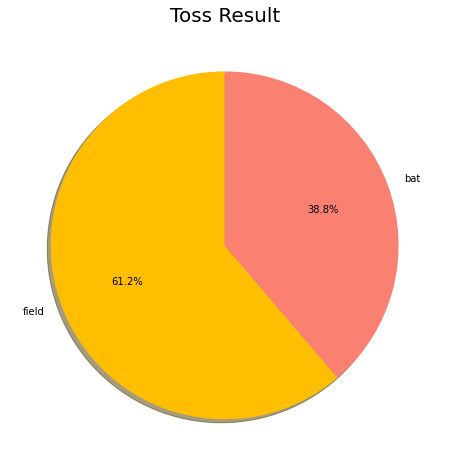

In [72]:
#  We will plot  pie chart on Toss Decision
Toss = data.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00' , '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes , labels = labels , colors = colors,
        autopct = '%1.1f%%' , shadow = True,startangle=90)
plt.title('Toss Result' ,fontsize = 20)
plt.show()


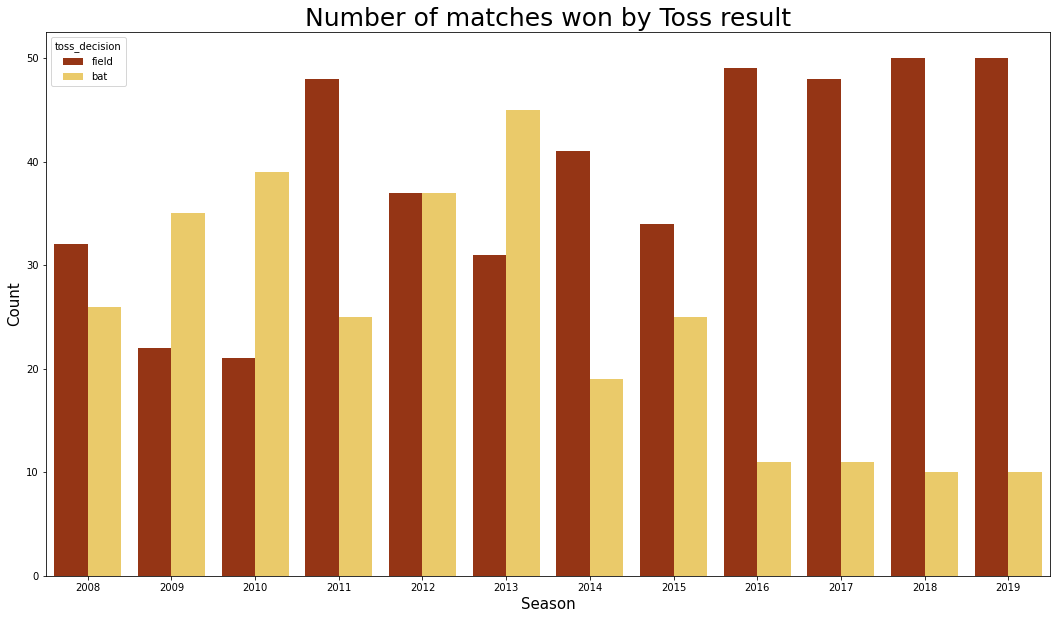

In [73]:
# We will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season', hue = 'toss_decision' ,data =data , palette = 'afmhot')
plt.title("Number of matches won by Toss result" ,fontsize = 25)
plt.xlabel("Season",fontsize =15)
plt.ylabel("Count",fontsize =15)
plt.show()

In [74]:
# We will print winner season wise
final_matches  =data.drop_duplicates(subset = ['season'] , keep = 'last')
final_matches[['season' , 'winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


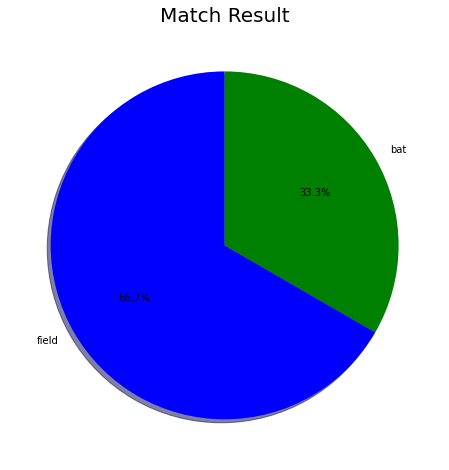

In [75]:
# We will plot pie chart on winning percentage in final
match = final_matches.win_by.value_counts()
labels = np.array(Toss.index)
sizes = match.values
colors = ['blue' , 'green']
plt.figure(figsize = (10,8))
plt.pie(sizes , labels = labels , colors = colors,
        autopct = '%1.1f%%' , shadow = True,startangle=90)
plt.title('Match Result' ,fontsize = 20)
plt.show()

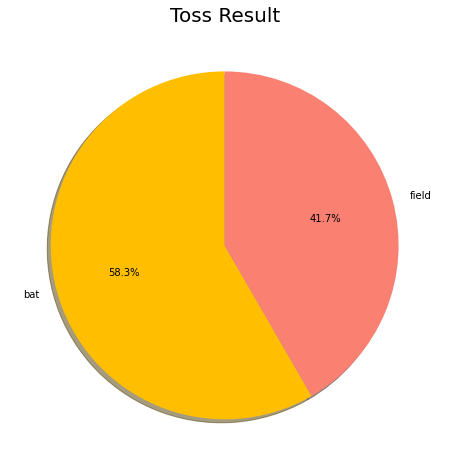

In [76]:
Toss = final_matches.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00' , '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes , labels = labels , colors = colors,
        autopct = '%1.1f%%' , shadow = True,startangle=90)
plt.title('Toss Result' ,fontsize = 20)
plt.show()

<Figure size 1296x720 with 0 Axes>

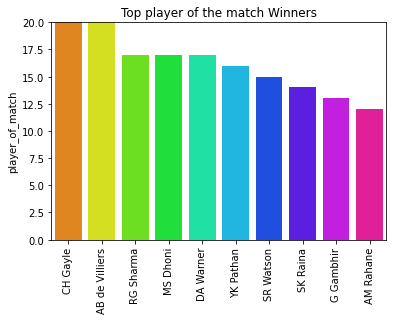

In [77]:
# We will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = data.player_of_match.value_counts()[:10]
fig , ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players , orient = 'v' , palette = "hsv");
plt.show()

In [79]:
# We will print IPL Finals venues and winners along with the number of wins . 
final_matches.groupby(['city' , 'winner']).size()


city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [80]:
# We will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [81]:
# We will print toss winner ,  toss decision , winner in final matches
final_matches[["toss_winner","toss_decision","winner"]].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [82]:
# We will print man of the match
final_matches[['winner' , 'player_of_match']].reset_index(drop = True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [83]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [84]:
# We will print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum') , ('fours' , 'count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,1196.0,299
Deccan Chargers,1000.0,250
Delhi Daredevils,1808.0,452
Gujarat Lions,872.0,218
Kings XI Punjab,1848.0,462
Kolkata Knight Riders,1672.0,418
Mumbai Indians,1848.0,462
Rajasthan Royals,1124.0,281
Rising Pune Supergiant,788.0,197


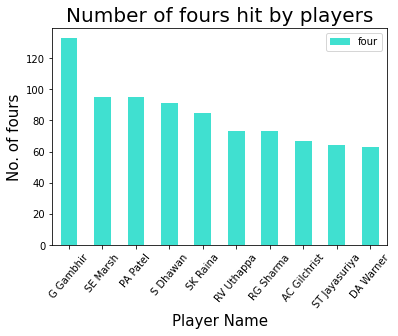

In [85]:
# We will plot graph on number of fours hit by players
batsman_four = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending = 0)
ax = batsman_four.iloc[:10, :].plot('batsman', 'four', kind = 'bar', color = 'turquoise')
plt.title("Number of fours hit by players" ,fontsize = 20)
plt.xticks(rotation = 50)
plt.xlabel("Player Name",fontsize =15)
plt.ylabel("No. of fours",fontsize =15)
plt.show()

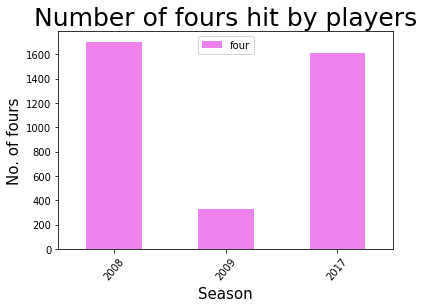

In [92]:
# We will plot graph on number of fours hit in each season

ax = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season' , 'four',kind = 'bar' , color = 'violet')
plt.title("Number of fours hit by players" ,fontsize = 25)
plt.xticks(rotation = 50)
plt.xlabel("Season",fontsize =15)
plt.ylabel("No. of fours",fontsize =15)
plt.show()

In [87]:
# We will print no. of sixes hit by team
six_data = complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six' , 'sum') , ('sixes' , 'count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,654.0,109
Deccan Chargers,732.0,122
Delhi Daredevils,936.0,156
Gujarat Lions,552.0,92
Kings XI Punjab,1224.0,204
Kolkata Knight Riders,1086.0,181
Mumbai Indians,1284.0,214
Rajasthan Royals,564.0,94
Rising Pune Supergiant,534.0,89


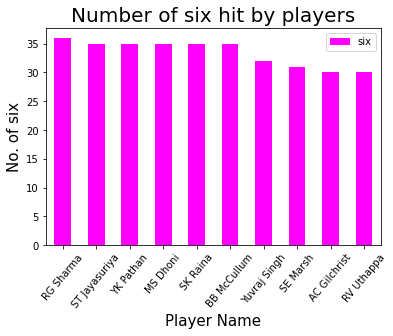

In [91]:
# We will plot graph of six hit by players
batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending = 0)
ax = batsman_six.iloc[:10, :].plot('batsman', 'six', kind = 'bar', color = 'magenta')
plt.title("Number of six hit by players" ,fontsize = 20)
plt.xticks(rotation = 50)
plt.xlabel("Player Name",fontsize =15)
plt.ylabel("No. of six",fontsize =15)
plt.show()

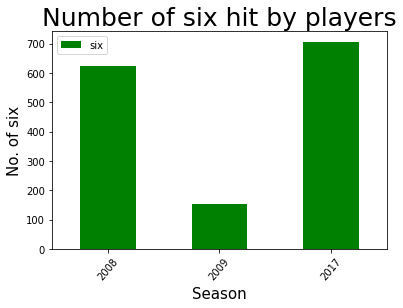

In [93]:
# We will plot graph on number of sixes hit in each season

ax = six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season' , 'six',kind = 'bar' , color = 'green')
plt.title("Number of six hit by players" ,fontsize = 25)
plt.xticks(rotation = 50)
plt.xlabel("Season",fontsize =15)
plt.ylabel("No. of six",fontsize =15)
plt.show()

In [95]:
# We will print the top 10 leading run scorer in IPL
batsman_score = Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum', ascending = False)
batsman_score = batsman_score.rename(columns={'sum' : 'batsman_runs'})
print("Top 10 Leading run scorer in IPL")
batsman_score.iloc[:10 , :]

Top 10 Leading run scorer in IPL


,batsman,batsman_runs
79,G Gambhir,1063.0
214,SK Raina,965.0
213,SE Marsh,880.0
200,S Dhawan,856.0
184,RG Sharma,846.0
152,MS Dhoni,783.0
193,RV Uthappa,746.0
167,PA Patel,743.0
271,YK Pathan,659.0
58,DA Warner,641.0
